In [151]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import networkx as nx
import gudhi
from playground import *

In [4]:
graphs = pickle.load(open('data_example/NCI1/networkx_graphs.pkl', 'rb'))

In [136]:
G = graphs[5]
print(len(G))

26


In [137]:
posG = nx.nx_pydot.graphviz_layout(G, prog="neato")

In [206]:
L = nx.normalized_laplacian_matrix(G)
A = np.eye(len(G)) - L.todense()

In [207]:
wavelet_signature = 32*np.diag(np.linalg.matrix_power(A, 6)) - 48 * np.diag(np.linalg.matrix_power(A, 4)) + 18* np.diag(np.linalg.matrix_power(A, 2)) - 1
wavelet_signature = (wavelet_signature - min(wavelet_signature))/(np.max(wavelet_signature) - np.min(wavelet_signature))

In [208]:
st = simplex_tree_constructor([list(e) for e in G.edges()])
stf = filtration_update(st,wavelet_signature)
pers = stf.persistence(homology_coeff_field = 2)


In [209]:
f = wavelet_signature
diagrams = [[],[],[], []]
pairs =  stf.persistence_pairs()
for interval in pairs:
    if len(interval[1]) == 0: #skip infinite bars
        continue
    else:
        if len(interval[0]) == 1: #H0
            bv = interval[0][0]
            dv = max([v for v in interval[1] if v != 1000], key = lambda v: f[v])
            if bv != dv:
                if  1000 in interval[1]:
                    diagrams[0].append((bv, dv))
                    print('ext')
                else:
                    diagrams[1].append((bv, dv))
        if len(interval[0]) == 2: #H1
            dv = max([v for v in interval[0] if v != 1000], key = lambda v: f[v])
            bv = min([v for v in interval[1] if v != 1000], key = lambda v: f[v])

            if bv != dv:
                if 1000 in interval[0]:
                    diagrams[2].append((bv, dv))
                else:
                    diagrams[3].append((bv, dv))
                    print(f[bv], f[dv])
                    #print(interval)
                    


ext
0.5909090909090905 1.0
0.5909090909090905 1.0


In [210]:
diagrams[-1]

[(17, 20), (22, 25)]

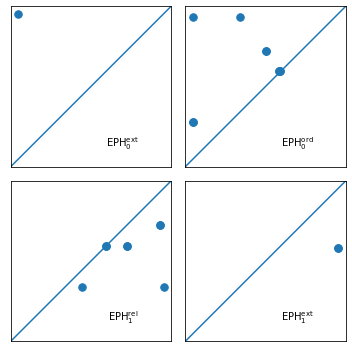

In [211]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2,2, figsize= [5,5])
j = 0
ax1.plot([f[x[0]] for x in diagrams[j]] , [f[x[1]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax1.plot([-1,2], [-1, 2])
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ext}}_0$', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, weight = 'bold') 

j+= 1

ax2.plot([f[x[0]] for x in diagrams[j]] , [f[x[1]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax2.plot([-1,2], [-1, 2])
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ord}}_0$', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, weight = 'bold') 

j+= 1

ax3.plot([f[x[1]] for x in diagrams[j]] , [f[x[0]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.plot([-1,2], [-1, 2])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{rel}}_1$', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, weight = 'bold') 

j+= 1

ax4.plot([f[x[1]] for x in diagrams[j]] , [f[x[0]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax4.set_xlim([-0.05, 1.05])
ax4.set_ylim([-0.05, 1.05])
ax4.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ext}}_1$', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, weight = 'bold') 

ax4.plot([-1,2], [-1, 2])
ax4.set_xticks([])
ax4.set_yticks([])


fig.tight_layout()
#fig.subplots_adjust(wspace=0.3)
#fig.savefig('example_diagrams.pdf', dpi = 300)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


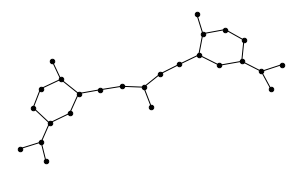

In [212]:
fig = plt.figure(figsize= [4,2.25])
nx.draw(G, pos=posG, node_color = 'k', node_size= 20)
plt.tight_layout()
plt.savefig('NCI1_neg_eg.pdf', dpi = 300)

In [213]:
print([f[x[1]] - f[x[0]] for x in diagrams[1]])

[0.2554112554112551, 0.2554112554112551, 0.0032467532467534976, 0.015151515151514028, 0.0032467532467534976, 0.015151515151514028, 0.24025974025973973, 0.24025974025973973, 0.6493506493506513, 0.9740259740259735]


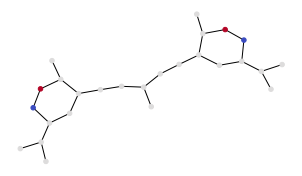

In [215]:
fig = plt.figure(figsize= [4,2.25])
b1_crit = np.zeros(len(G))
b1_crit[[i[0] for i in diagrams[3]]] += 1
b1_crit[[i[1] for i in diagrams[3]]] -= 1
nx.draw(G, pos=posG, node_color = b1_crit, node_size= 20, vmin = -1, vmax= 1, cmap ='coolwarm')
plt.savefig('NCI1_neg_eg_H1crit.pdf', dpi = 300)

In [216]:
H = graphs[-11]
print(len(H))

43


In [217]:
posH = nx.nx_pydot.graphviz_layout(H, prog= 'neato')
posH_kk = nx.kamada_kawai_layout(H)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


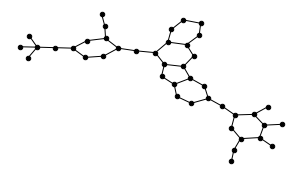

In [218]:
fig = plt.figure(figsize= [4,2.25])
nx.draw(H, pos=posH, node_color = 'k', node_size= 20)
plt.tight_layout()
plt.savefig('NCI1_pos_eg.pdf', dpi = 300)

In [219]:
L = nx.normalized_laplacian_matrix(H)
A = np.eye(len(H)) - L.todense()

In [220]:
wavelet_signature = 32*np.diag(np.linalg.matrix_power(A, 6)) - 48 * np.diag(np.linalg.matrix_power(A, 4)) + 18* np.diag(np.linalg.matrix_power(A, 2)) - 1
wavelet_signature = (wavelet_signature - min(wavelet_signature))/(np.max(wavelet_signature) - np.min(wavelet_signature))

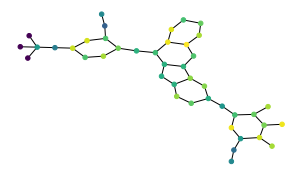

In [221]:
fig = plt.figure(figsize= [4,2.25])
nx.draw(H, pos=posH, node_color = wavelet_signature, node_size= 20)
plt.show()

In [222]:
st = simplex_tree_constructor([list(e) for e in H.edges()])
stf = filtration_update(st,wavelet_signature)
pers = stf.persistence(homology_coeff_field = 2)


In [223]:
f = wavelet_signature
diagrams = [[],[],[], []]
pairs =  stf.persistence_pairs()
for interval in pairs:
    if len(interval[1]) == 0: #skip infinite bars
        continue
    else:
        if len(interval[0]) == 1: #H0
            bv = interval[0][0]
            dv = max([v for v in interval[1] if v != 1000], key = lambda v: f[v])
            if bv != dv:
                if  1000 in interval[1]:
                    diagrams[0].append((bv, dv))
                    print('ext')
                else:
                    diagrams[1].append((bv, dv))
        if len(interval[0]) == 2: #H1
            dv = max([v for v in interval[0] if v != 1000], key = lambda v: f[v])
            bv = min([v for v in interval[1] if v != 1000], key = lambda v: f[v])

            if bv != dv:
                if 1000 in interval[0]:
                    diagrams[2].append((bv, dv))
                else:
                    diagrams[3].append((bv, dv))
                    print(f[bv], f[dv])
                    #print(interval)
                    


ext
0.7153923396930145 0.9368813656577264
0.7010471955243162 1.0
0.6316166977478129 1.0
0.6235834170133429 0.8370391622435825
0.6098120786113924 0.8244154353751253
0.5317744943336697 0.9747525462630929


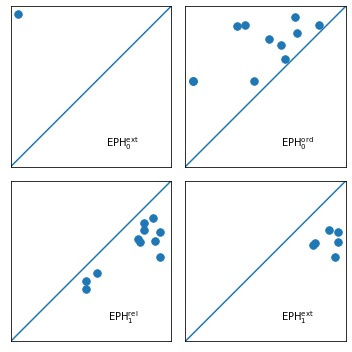

In [224]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2,2, figsize= [5,5])
j = 0
ax1.plot([f[x[0]] for x in diagrams[j]] , [f[x[1]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax1.plot([-1,2], [-1, 2])
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ext}}_0$', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, weight = 'bold') 

j+= 1

ax2.plot([f[x[0]] for x in diagrams[j]] , [f[x[1]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax2.plot([-1,2], [-1, 2])
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ord}}_0$', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, weight = 'bold') 

j+= 1

ax3.plot([f[x[1]] for x in diagrams[j]] , [f[x[0]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.plot([-1,2], [-1, 2])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{rel}}_1$', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, weight = 'bold') 

j+= 1

ax4.plot([f[x[1]] for x in diagrams[j]] , [f[x[0]] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax4.set_xlim([-0.05, 1.05])
ax4.set_ylim([-0.05, 1.05])
ax4.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ext}}_1$', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, weight = 'bold') 

ax4.plot([-1,2], [-1, 2])
ax4.set_xticks([])
ax4.set_yticks([])


fig.tight_layout()
#fig.subplots_adjust(wspace=0.3)
#fig.savefig('example_diagrams.pdf', dpi = 300)

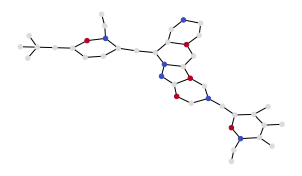

In [225]:
fig = plt.figure(figsize= [4,2.25])
b1_crit = np.zeros(len(H))
b1_crit[[i[0] for i in diagrams[3]]] -= 1
b1_crit[[i[1] for i in diagrams[3]]] += 1
nx.draw(H, pos=posH, node_color = b1_crit, node_size= 20, vmin = -1, vmax= 1, cmap ='coolwarm')
plt.savefig('NCI1_pos_eg_H1crit.pdf', dpi = 300)

In [ ]:
fig = plt.figure(figsize= [4,2.25])